In [1]:
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
import numpy as np
import healpy as hp

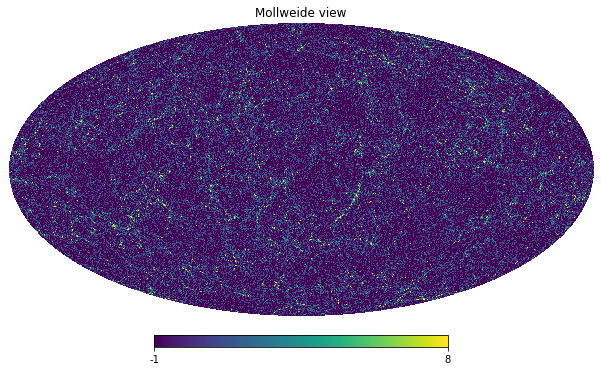

In [28]:
overdensity = hp.read_map("MAPS/overdensity_NS_2048_R_256_P_768.fits")
hp.mollview(overdensity,xsize=6400, max=8)

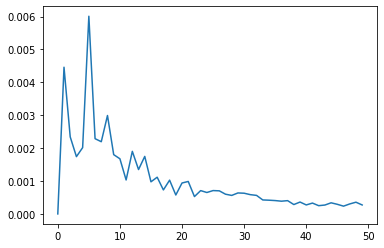

In [29]:
plt.plot(hp.sphtfunc.anafast(overdensity)[0:50]);

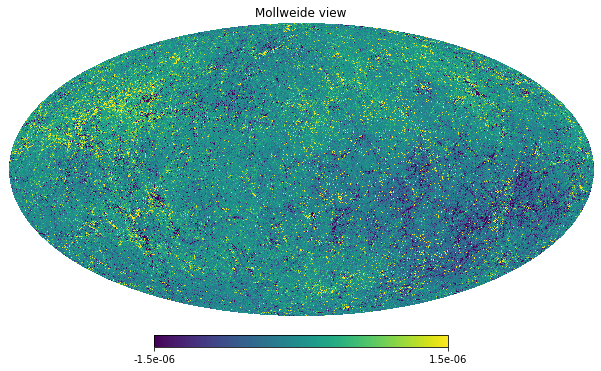

In [20]:
kSZ = hp.read_map("MAPS/kSZ_NS_1024_R_384_P_768.fits")
hp.mollview(kSZ,xsize=6400, min=-1.5*10**-6,max=1.5*10**-6)

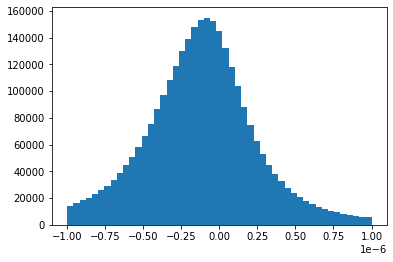

In [6]:
plt.hist(kSZ,bins = np.linspace(-1*10**-6,1*10**-6));

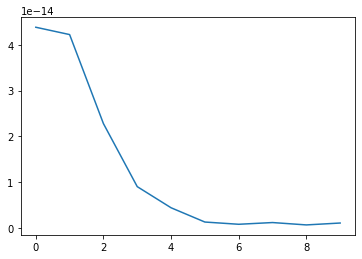

In [21]:
plt.plot(hp.sphtfunc.anafast(kSZ)[0:10]);

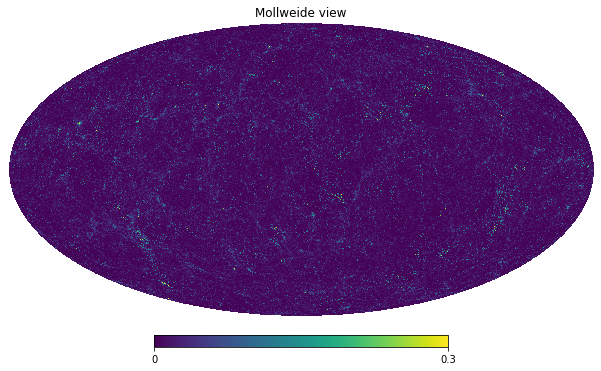

In [23]:
convergence = hp.read_map("MAPS/convergence_NS_1024_R_384_P_768.fits")
hp.mollview(convergence,xsize=3200,max=.3)

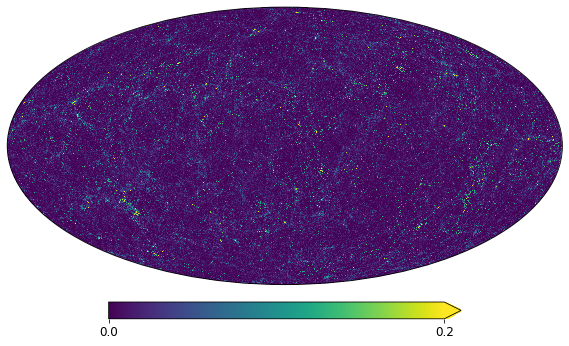

In [25]:
hp.newvisufunc.projview(convergence,max=.2,xsize=3200);

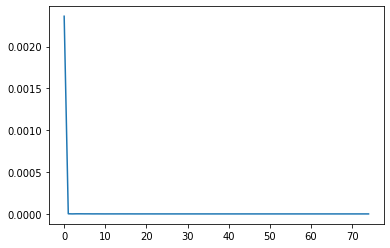

In [26]:
plt.plot(hp.sphtfunc.anafast(convergence)[0:75]);